Importing Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings

In [28]:
strk_data = pd.read_csv('dataset//healthcare-dataset-stroke-data2.csv')
strk_data.head(20)

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Unnamed: 0.1,id
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,NaN,NaN
1,1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1,NaN,NaN
2,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,NaN,NaN
3,3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,NaN,NaN
4,4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,NaN,NaN
5,5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,NaN,NaN
6,6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,NaN,NaN
7,7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,NaN,NaN
8,8,Female,59.0,0,0,Yes,Private,Rural,76.15,22.8,Unknown,1,NaN,NaN
9,9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,NaN,NaN


In [29]:
strk_data.columns

Index(['Unnamed: 0', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke', 'Unnamed: 0.1', 'id'],
      dtype='object')

In [30]:
strk_data.drop(columns=['Unnamed: 0','Unnamed: 0.1','id'], axis=1, inplace=True)
strk_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0


In [31]:
strk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13717 entries, 0 to 13716
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             13717 non-null  object 
 1   age                13717 non-null  float64
 2   hypertension       13717 non-null  int64  
 3   heart_disease      13717 non-null  int64  
 4   ever_married       13717 non-null  object 
 5   work_type          13717 non-null  object 
 6   Residence_type     13717 non-null  object 
 7   avg_glucose_level  13717 non-null  float64
 8   bmi                13717 non-null  float64
 9   smoking_status     13717 non-null  object 
 10  stroke             13717 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.2+ MB


In [32]:
strk_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000
mean,52.710578,0.207115,0.367573,122.974367,28.387444,0.525625
std,19.895387,0.405254,0.482162,44.010363,7.329634,0.499361
min,18.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,36.000000,0.000000,0.000000,85.250000,22.800000,0.000000
50%,52.000000,0.000000,0.000000,114.180000,28.160000,1.000000
75%,69.000000,0.000000,1.000000,158.820000,33.800000,1.000000
max,90.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [33]:
strk_data.shape

(13717, 11)

In [34]:
strk_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
[features for features in strk_data.columns if strk_data[features].isnull().sum()>0]

[]

Replacing missing values using forward fill

In [36]:
strk_data['bmi'].isnull().sum()

0

Seperating dependent variables from independent variables

In [37]:
strk_data2 = strk_data.copy()
strk_data2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0


Removing outliers

In [40]:
def remove_outliers(dataframe, column_name, multiplier=1.5):

    strk_data2 = dataframe.copy()

    # Calculate the IQR (Interquartile Range)
    q1 = strk_data2[column_name].quantile(0.25)
    q3 = strk_data2[column_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr

    # Filter out rows with values outside the bounds
    df_filtered = strk_data2[(strk_data2[column_name] >= lower_bound) & (strk_data2[column_name] <= upper_bound)]
    
    # Calculate the number of differences
    num_differences = len(strk_data2) - len(df_filtered)

    print(f"Number of outlier: {num_differences}")

    return df_filtered

In [41]:
strk_data2= remove_outliers(strk_data2, 'avg_glucose_level')
strk_data2= remove_outliers(strk_data2, 'bmi')

Number of outlier: 1
Number of outlier: 73


In [42]:
unique_values_per_column = {}

columns_to_check = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for col in columns_to_check:
    unique_values = strk_data2[col].unique()
    unique_values_per_column[col] = unique_values
    print(f"Unique values for {col}: {unique_values}")

Unique values for gender: ['Male' 'Female' 'Other']
Unique values for hypertension: [0 1]
Unique values for heart_disease: [1 0]
Unique values for ever_married: ['Yes' 'No' 'Other']
Unique values for work_type: ['Private' 'Self-employed' 'Govt_job' 'Never_worked']
Unique values for Residence_type: ['Urban' 'Rural']
Unique values for smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values for stroke: [1 0]


In [43]:
# Negative value
columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

for a in range(len(columns)):
    print("Is there any negative value in '{}' column  : {} ".format(columns[a],(strk_data2[columns[a]]<0).any()))

Is there any negative value in 'age' column  : False 
Is there any negative value in 'hypertension' column  : False 
Is there any negative value in 'heart_disease' column  : False 
Is there any negative value in 'avg_glucose_level' column  : False 
Is there any negative value in 'bmi' column  : False 
Is there any negative value in 'stroke' column  : False 


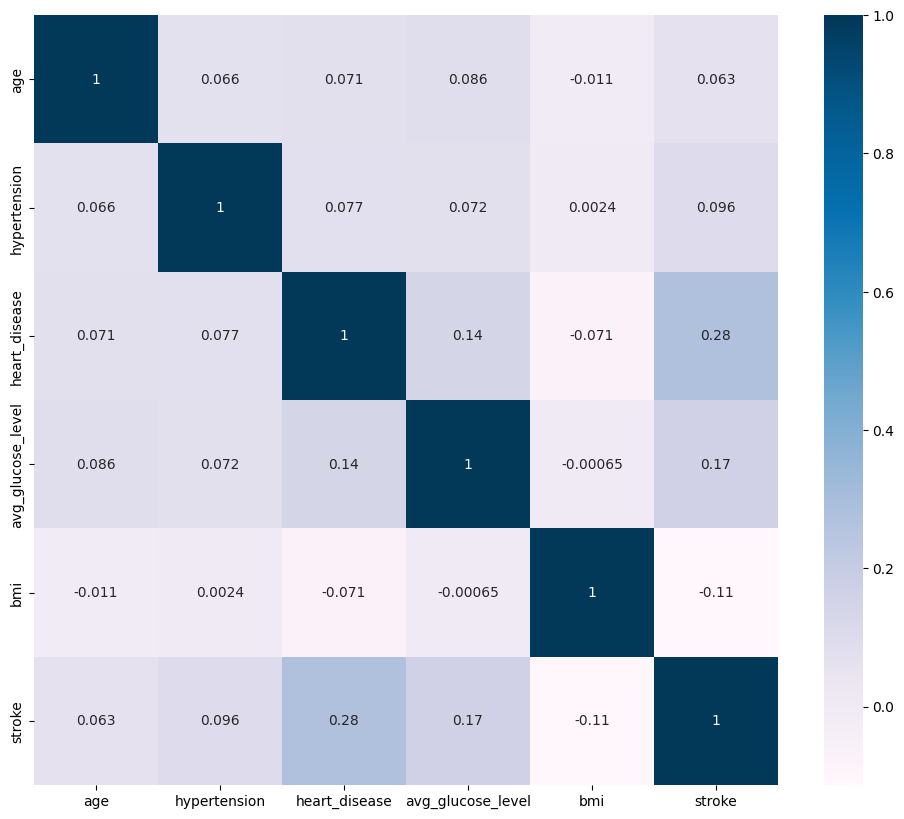

In [44]:
correlation=strk_data2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation,annot=True,cmap='PuBu',fmt=".2g",)
plt.show()

In [45]:
strk_data2['stroke'].value_counts()

1    7208
0    6435
Name: stroke, dtype: int64

In [46]:
y=strk_data2['stroke']
y

0        1
1        1
2        1
3        1
4        1
        ..
13712    0
13713    0
13714    0
13715    0
13716    0
Name: stroke, Length: 13643, dtype: int64

In [47]:
X= strk_data2.drop(['stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked
...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked


In [125]:
# from imblearn.over_sampling import (RandomOverSampler)

In [126]:
# resamp = RandomOverSampler()
# X, y = resamp.fit_resample(X, y )

Checking for numerical features and Categorical features

In [48]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [49]:
print('These are numerial features:  ', num_features)
print('These are categorical features:  ', cat_features)

These are numerial features:   Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
These are categorical features:   Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [51]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((10914, 10), (2729, 10))

Feature Scaling

In [52]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [53]:
print('X_train ', X_train.shape, 'X_test', X_test.shape)

X_train  (10914, 21) X_test (2729, 21)


In [61]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Class distribution before oversampling:", Counter(y_train))
print("Class distribution before oversampling:", Counter(y_test))


smote = SMOTE(random_state=42)


X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)


print("Class distribution after oversampling:", Counter(y_train))
print("Class distribution after oversampling:", Counter(y_test))

Class distribution before oversampling: Counter({1: 5782, 0: 5132})
Class distribution before oversampling: Counter({1: 1426, 0: 1303})
Class distribution after oversampling: Counter({1: 5782, 0: 5782})
Class distribution after oversampling: Counter({1: 1426, 0: 1426})


In [62]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [63]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier
()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Root Mean Squared Error: 0.5491
- Mean Absolute Error: 0.3015
- R2 Score: -0.2062
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5414
- Mean Absolute Error: 0.2931
- R2 Score: -0.1725


K-Neighbors Classifier
Model performance for Training set
- Root Mean Squared Error: 0.4555
- Mean Absolute Error: 0.2075
- R2 Score: 0.1702
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5624
- Mean Absolute Error: 0.3163
- R2 Score: -0.2651


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5998
- Mean Absolute Error: 0.3597
- R2 Score: -0.4390


Random Forest Classifier
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Sco

In [64]:
ran_model = RandomForestClassifier(max_depth=None, min_samples_split=2,random_state=0)
ran_model = ran_model.fit(X_train, y_train)
y_pred = ran_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -3.09


In [65]:
cat_model=CatBoostClassifier(verbose=False)
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 4.35


In [137]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
4691,1,1,0
6634,1,1,0
7276,1,1,0
9566,1,1,0
11386,0,1,-1
...,...,...,...
43,1,0,1
17,1,0,1
3679,0,0,0
8348,1,1,0


In [66]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
classifiers = {
    'LinearSVC': LinearSVC(),
    'MultinomialNB': MultinomialNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier()
}

In [67]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

# Initialize StratifiedKFold with k=5 (adjust as needed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation for each classifier
for clf_name, classifier in classifiers.items():
    predictions = cross_val_predict(classifier, X_train, y_train, cv=kfold)

    # Evaluate the model
    accuracy = accuracy_score(y_train, predictions)
    report = classification_report(y_test, predictions)

    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)

ValueError: Found input variables with inconsistent numbers of samples: [2852, 11564]